# **Real-Time Stock Market Analytics: Leveraging Big Data for Predictive Insights**

## Data collection is vital for our stock price prediction project, involving the acquisition of historical market data from Yahoo Finance API and real-time insights from the Finviz website. Historical data offers insights into long-term trends, while real-time data captures immediate market sentiments. By integrating these sources, we aim to build a comprehensive dataset. This section outlines our methodologies and tools for gathering and integrating data.

# 1. Historical data Collection


## yahoo Finance is being used for collecting historical data of stocks


### 1. Utilizing the Yahoo Finance API to retrieve historical stock market data spanning the past five years.
### 2. Specifying the desired stocks.
### 3. Extracting relevant information such as opening price, closing price, high, low, volume, and adjusted close for each specified stock or index.
### 4. Storing the collected data in a structured format, for further processing and analysis.


In [1]:
# Installing necessary library
!pip install yfinance

## Importing necessary libraries

In [2]:
import yfinance as yf
import pandas as pd
import os
import plotly.graph_objects as go

# Defining stock names to get the historical data of past 5 years


Below we are collecting data for past 5 years with below parameters.
Parameters

1.   **Date**: This column represents the date of the trading day.
2.   **Open**: The opening price of the stock on the given trading day.
3.   **High**: The highest price the stock reached during the trading day.
4.   **Low**: The lowest price the stock reached during the trading day.
5.   **Close**: The closing price of the stock on the given trading day.
6.   **Adj Close**: The adjusted closing price takes into account any corporate actions that might affect the stock price, such as dividends or stock splits.
7. Volume: The number of shares traded on the given trading day.






## Below we are collecting data for 5 stocks for past 1 month

In [3]:
import yfinance as yf
import pandas as pd

dfs = []

tickers = ["AMZN", "AAPL", "GOOGL", "MSFT", "TSLA"]

start_date = "2024-03-09"
end_date = "2024-04-11"

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    data['Stock'] = ticker
    dfs.append(data)

combined_data = pd.concat(dfs)
print(f"{'Stock':<8} {'Date':<12} {'Open':<12} {'High':<12} {'Low':<12} {'Close':<12} {'Adj Close':<12} {'Volume':<12}")

for index, row in combined_data.iterrows():
    print(f"{row['Stock']:<8} {index} {row['Open']:<12.6f} {row['High']:<12.6f} {row['Low']:<12.6f} {row['Close']:<12.6f} {row['Adj Close']:<12.6f} {row['Volume']:<12.1f}")


Stock    Date         Open         High         Low          Close        Adj Close    Volume      
AMZN     2024-03-11 00:00:00 174.309998   174.470001   171.470001   171.960007   171.960007   28484800.0  
AMZN     2024-03-12 00:00:00 173.500000   176.759995   171.979996   175.389999   175.389999   36610600.0  
AMZN     2024-03-13 00:00:00 175.899994   177.619995   175.550003   176.559998   176.559998   30772600.0  
AMZN     2024-03-14 00:00:00 177.690002   179.529999   176.470001   178.750000   178.750000   43705800.0  
AMZN     2024-03-15 00:00:00 176.639999   177.929993   173.899994   174.419998   174.419998   72115500.0  
AMZN     2024-03-18 00:00:00 175.800003   176.690002   174.279999   174.479996   174.479996   31250700.0  
AMZN     2024-03-19 00:00:00 174.220001   176.089996   173.520004   175.899994   175.899994   26880900.0  
AMZN     2024-03-20 00:00:00 176.139999   178.529999   174.639999   178.149994   178.149994   29947200.0  
AMZN     2024-03-21 00:00:00 179.990005   18

## Data Visualization for past 1 month for Amazon stock

### Using Plotly library creating a candlestick chart. A candlestick chart is a type of financial chart that shows the open, high, low, and close prices of a security for a specific time period. Each "candlestick" represents one trading day.

## E.g. Amazon

In [4]:
ticker = "AMZN"
start_date = "2024-03-09"
end_date = "2024-04-11"

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

df = pd.DataFrame(data)


df['date'] = pd.to_datetime(df.index)

fig = go.Figure(data = [go.Candlestick(x=df['date'],
                                       open=df['Open'],
                                       high=df['High'],
                                       low=df['Low'],
                                       close=df['Close']
                                       )])

fig.update_layout(
    title='Stock Price Chart AAPL',
    yaxis_title = 'Price ($)',
    xaxis_rangeslider_visible = False
)

fig.show()

## For better data visualization understanding - Data collection and Visualization for the current month for Amazon stock

### This plot is showing candlestick chart representing the stock price movement of the ticker symbol "AMZN" for the date range from April 1, 2024, to April 11, 2024

In [5]:
ticker = "AMZN"
start_date = "2024-04-01"
end_date = "2024-04-11"
data = yf.download(ticker, start=start_date, end=end_date, progress=False)
print(f"{'Date':<12} {'Open':<12} {'High':<12} {'Low':<12} {'Close':<12} {'Adj Close':<12} {'Volume':<12}")

for index, row in data.iterrows():
    print(f"{index} {row['Open']:<12.6f} {row['High']:<12.6f} {row['Low']:<12.6f} {row['Close']:<12.6f} {row['Adj Close']:<12.6f} {row['Volume']:<12.1f}")

# Plotting graph
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(title=f"Stock Price Chart for {ticker}",
                  xaxis_title="Date",
                  yaxis_title="Price ($)",
                  xaxis_rangeslider_visible=False)

fig.show()

Date         Open         High         Low          Close        Adj Close    Volume      
2024-04-01 00:00:00 180.789993   183.000000   179.949997   180.970001   180.970001   29174500.0  
2024-04-02 00:00:00 179.070007   180.789993   178.380005   180.690002   180.690002   32611500.0  
2024-04-03 00:00:00 179.899994   182.869995   179.800003   182.410004   182.410004   31046600.0  
2024-04-04 00:00:00 184.000000   185.100006   180.000000   180.000000   180.000000   41624300.0  
2024-04-05 00:00:00 182.380005   186.270004   181.970001   185.070007   185.070007   42335200.0  
2024-04-08 00:00:00 186.899994   187.289993   184.809998   185.190002   185.190002   39221300.0  
2024-04-09 00:00:00 187.240005   187.339996   184.199997   185.669998   185.669998   36546900.0  
2024-04-10 00:00:00 182.770004   186.270004   182.669998   185.949997   185.949997   35879200.0  


## Performing Exploratory Data Analysis (EDA) in order to understand data more and find patterns and relationships in the data.

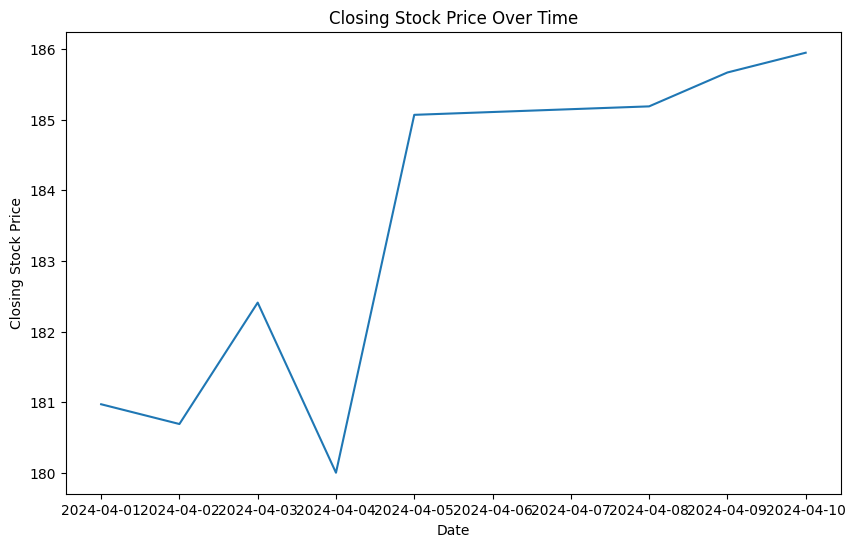

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=data)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

We can see in the above line plot that the closing stock prices have increased over time.

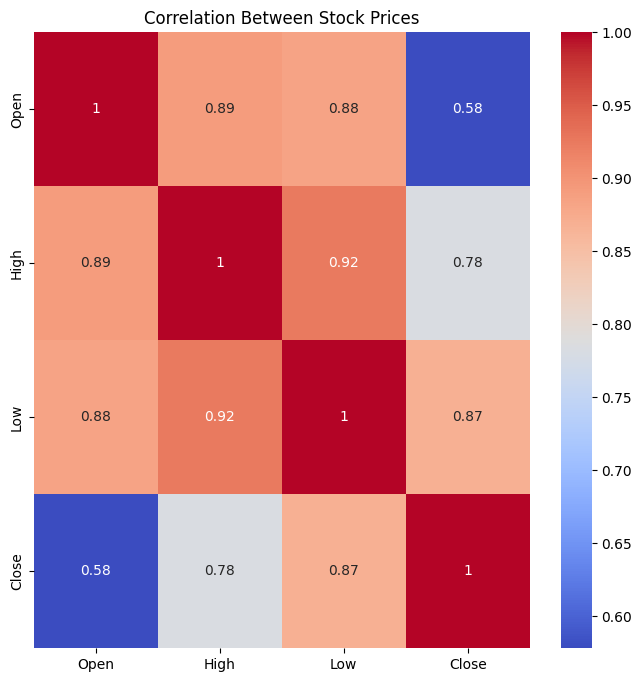

In [7]:
# Creating a heatmap of the correlation between stock prices
corr = data[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

From the heatmap, we can see that the opening and closing prices have a strong positive correlation, while the low and high prices have a weaker positive correlation.

# 2. Present news data Collection




## Real-Time Data Scraping from Finviz Website:

### Data will be scrapped for the stock and sentiment analysis will be performed based on current news

### We are extracting stock sentiments from financial news headlines in the FinViz website using the NLP web scraping algorithm in Python.

1. Employing web scraping techniques to gather real-time market insights from the Finviz website.
2. Targeting relevant sections containing market news, sentiments, and factors impacting stock prices.
3. Utilizing BeautifulSoup library in Python for parsing HTML content.
4. Extracting textual data.

In [8]:
# Importing necessary libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


tickers_list = ['AMZN']
news = pd.DataFrame(columns=['Date', 'Time', 'Headline', 'Ticker'])

for ticker in tickers_list:
    url = f'https://finviz.com/quote.ashx?t={ticker}&p=d'
    ret = requests.get(
        url,
        headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'},
    )

    html = BeautifulSoup(ret.content, "html.parser")

    try:
        df = pd.read_html(
            str(html),
            attrs={'class': 'fullview-news-outer'}
        )[0]
    except Exception as e:
        print(f"Exception occurred while parsing news for {ticker}: {e}")
        continue

    df.columns = ['Date', 'Headline']
    df['Ticker'] = ticker

    dateNTime = df['Date'].apply(lambda x: datetime.now().strftime('%Y-%m-%d') if x == 'Today' else x)
    dateNTime = dateNTime.str.split(r' |,', expand=True).replace("", None).ffill()
    df = pd.merge(df, dateNTime, right_index=True, left_index=True).drop('Date', axis=1).rename(columns={0: 'Date', 1: 'Time'})
    df = df[df["Headline"].str.contains("Loading.") == False].loc[:, ['Date', 'Time', 'Headline', 'Ticker']]

    # Filter news for the present day
    today = datetime.now().strftime('%Y-%m-%d')
    df['Date'] = pd.to_datetime(df['Date'] + " " + df['Time'], errors='coerce')
    df = df[df['Date'].dt.date == datetime.now().date()]

    news = pd.concat([news, df], ignore_index=True)

print("Final DataFrame:")
print(news)


Final DataFrame:
                  Date     Time  \
0  2024-04-12 12:56:00  12:56PM   
1  2024-04-12 12:56:00  12:56PM   
2  2024-04-12 12:56:00  12:56PM   
3  2024-04-12 12:56:00  12:56PM   
4  2024-04-12 12:56:00  12:56PM   
..                 ...      ...   
91 2024-04-12 22:08:00  10:08PM   
92 2024-04-12 22:08:00  10:08PM   
93 2024-04-12 22:08:00  10:08PM   
94 2024-04-12 22:08:00  10:08PM   
95 2024-04-12 17:25:00  05:25PM   

                                             Headline Ticker  
0   How Amazon and Target are shaking up frictionl...   AMZN  
1   Crime-Ridden San Francisco Seeks To Allow Laws...   AMZN  
2   Amazon Is Positioned as the Foundation for Ret...   AMZN  
3   Here's How You Can Save Money on These 4 Dog E...   AMZN  
4   Google seeks to monetize AI investments with A...   AMZN  
..                                                ...    ...  
91  3 No-Brainer Warren Buffett Stocks to Buy Righ...   AMZN  
92  3 E-Commerce Stocks That Have Outperformed Ama...   AM

## Collecting data here for 5 stocks

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

tickers_list = ['AMZN', 'AAPL', 'GOOGL', 'JPM', 'NVDA']
news = pd.DataFrame(columns=['Date', 'Time', 'Headline', 'Ticker'])

for ticker in tickers_list:
    url = f'https://finviz.com/quote.ashx?t={ticker}&p=d'
    ret = requests.get(
        url,
        headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'},
    )

    html = BeautifulSoup(ret.content, "html.parser")

    try:
        df = pd.read_html(
            str(html),
            attrs={'class': 'fullview-news-outer'}
        )[0]
    except Exception as e:
        print(f"Exception occurred while parsing news for {ticker}: {e}")
        continue

    df.columns = ['Date', 'Headline']
    df['Ticker'] = ticker

    dateNTime = df['Date'].apply(lambda x: datetime.now().strftime('%Y-%m-%d') if x == 'Today' else x)
    dateNTime = dateNTime.str.split(r' |,', expand=True).replace("", None).ffill()
    df = pd.merge(df, dateNTime, right_index=True, left_index=True).drop('Date', axis=1).rename(columns={0: 'Date', 1: 'Time'})
    df = df[df["Headline"].str.contains("Loading.") == False].loc[:, ['Date', 'Time', 'Headline', 'Ticker']]

    # Filter news for the present day
    today = datetime.now().strftime('%Y-%m-%d')
    df['Date'] = pd.to_datetime(df['Date'] + " " + df['Time'], errors='coerce')
    df = df[df['Date'].dt.date == datetime.now().date()]

    news = pd.concat([news, df], ignore_index=True)

print("Final DataFrame:")
print(news)


Final DataFrame:
                   Date     Time  \
0   2024-04-12 12:56:00  12:56PM   
1   2024-04-12 12:56:00  12:56PM   
2   2024-04-12 12:56:00  12:56PM   
3   2024-04-12 12:56:00  12:56PM   
4   2024-04-12 12:56:00  12:56PM   
..                  ...      ...   
475 2024-04-12 18:31:00  06:31PM   
476 2024-04-12 18:31:00  06:31PM   
477 2024-04-12 18:31:00  06:31PM   
478 2024-04-12 18:31:00  06:31PM   
479 2024-04-12 18:31:00  06:31PM   

                                              Headline Ticker  
0    How Amazon and Target are shaking up frictionl...   AMZN  
1    Crime-Ridden San Francisco Seeks To Allow Laws...   AMZN  
2    Amazon Is Positioned as the Foundation for Ret...   AMZN  
3    Here's How You Can Save Money on These 4 Dog E...   AMZN  
4    Google seeks to monetize AI investments with A...   AMZN  
..                                                 ...    ...  
475  Equity Hedge Funds Fail to Beat Benchmarks Des...   NVDA  
476  What Nvidia Stock Investors Shoul

In [11]:
# Print unique values in the 'Date' column
unique_dates = news['Date'].dt.date.unique()
print("Unique dates:")
print(unique_dates)


Unique dates:
[datetime.date(2024, 4, 12)]


In [12]:
# Printing unique stocks
unique_tickers = news['Ticker'].unique()
print("Unique tickers:")
print(unique_tickers)

Unique tickers:
['AMZN' 'AAPL' 'GOOGL' 'JPM' 'NVDA']
